#Importing

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
import plotly.offline as py
import plotly.express as px
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
sns.set(style='darkgrid')
pd.options.display.max_rows=10
pd.options.display.max_columns=10

#Getting Data

In [224]:
dataset=pd.read_csv('/content/CarPrice_Assignment.csv')
df=dataset.copy()

#1. Introduction

The data pertains to the US market for cars. It introduces some features that may have a relation to car prices that will help in predicting prices of the cars in ML.

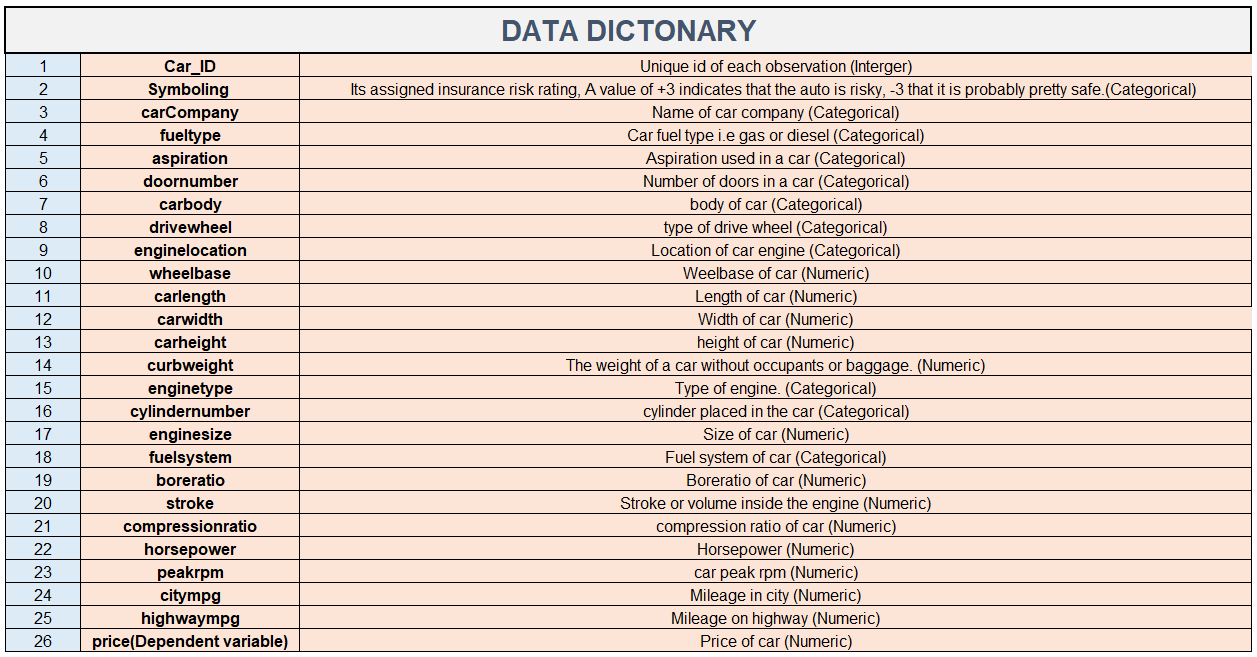


# 2. Exploratory Data Analysis

Showing a sample of the dataset.

In [225]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,...,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,...,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,...,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,...,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,...,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,...,115,5500,18,22,17450.0


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observations:-**

- There are 205 entries in the dataset.
- There are no nulls.
- We have columns of "object" datatype. If any of them is needed in ML, we will apply encoding on it.


In [227]:
def data_info(data):
    cols = data.columns
    unique_val = [data[col].value_counts().head(10).index.to_numpy() for col in cols]
    n_uniques = [data[col].nunique() for col in cols]
    dtypes = [data[col].dtype for col in cols]
    nulss = [data[col].isnull().sum() for col in cols]
    dup = [data.duplicated().sum() for col in cols]
    return pd.DataFrame({'Col': cols, 'dtype': dtypes, 'n_uniques': n_uniques, 'n_nan': nulss, 'unique_val': unique_val, 'duplicated': dup})

In [228]:
pd.options.display.max_rows=None
data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,car_ID,int64,205,0,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",0
1,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
2,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
3,fueltype,object,2,0,"[gas, diesel]",0
4,aspiration,object,2,0,"[std, turbo]",0
5,doornumber,object,2,0,"[four, two]",0
6,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
7,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
8,enginelocation,object,2,0,"[front, rear]",0
9,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0


**Observations:-**


- No Nan.


## Categorical Features

In [229]:
Categorical_Features=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
len(Categorical_Features)

9

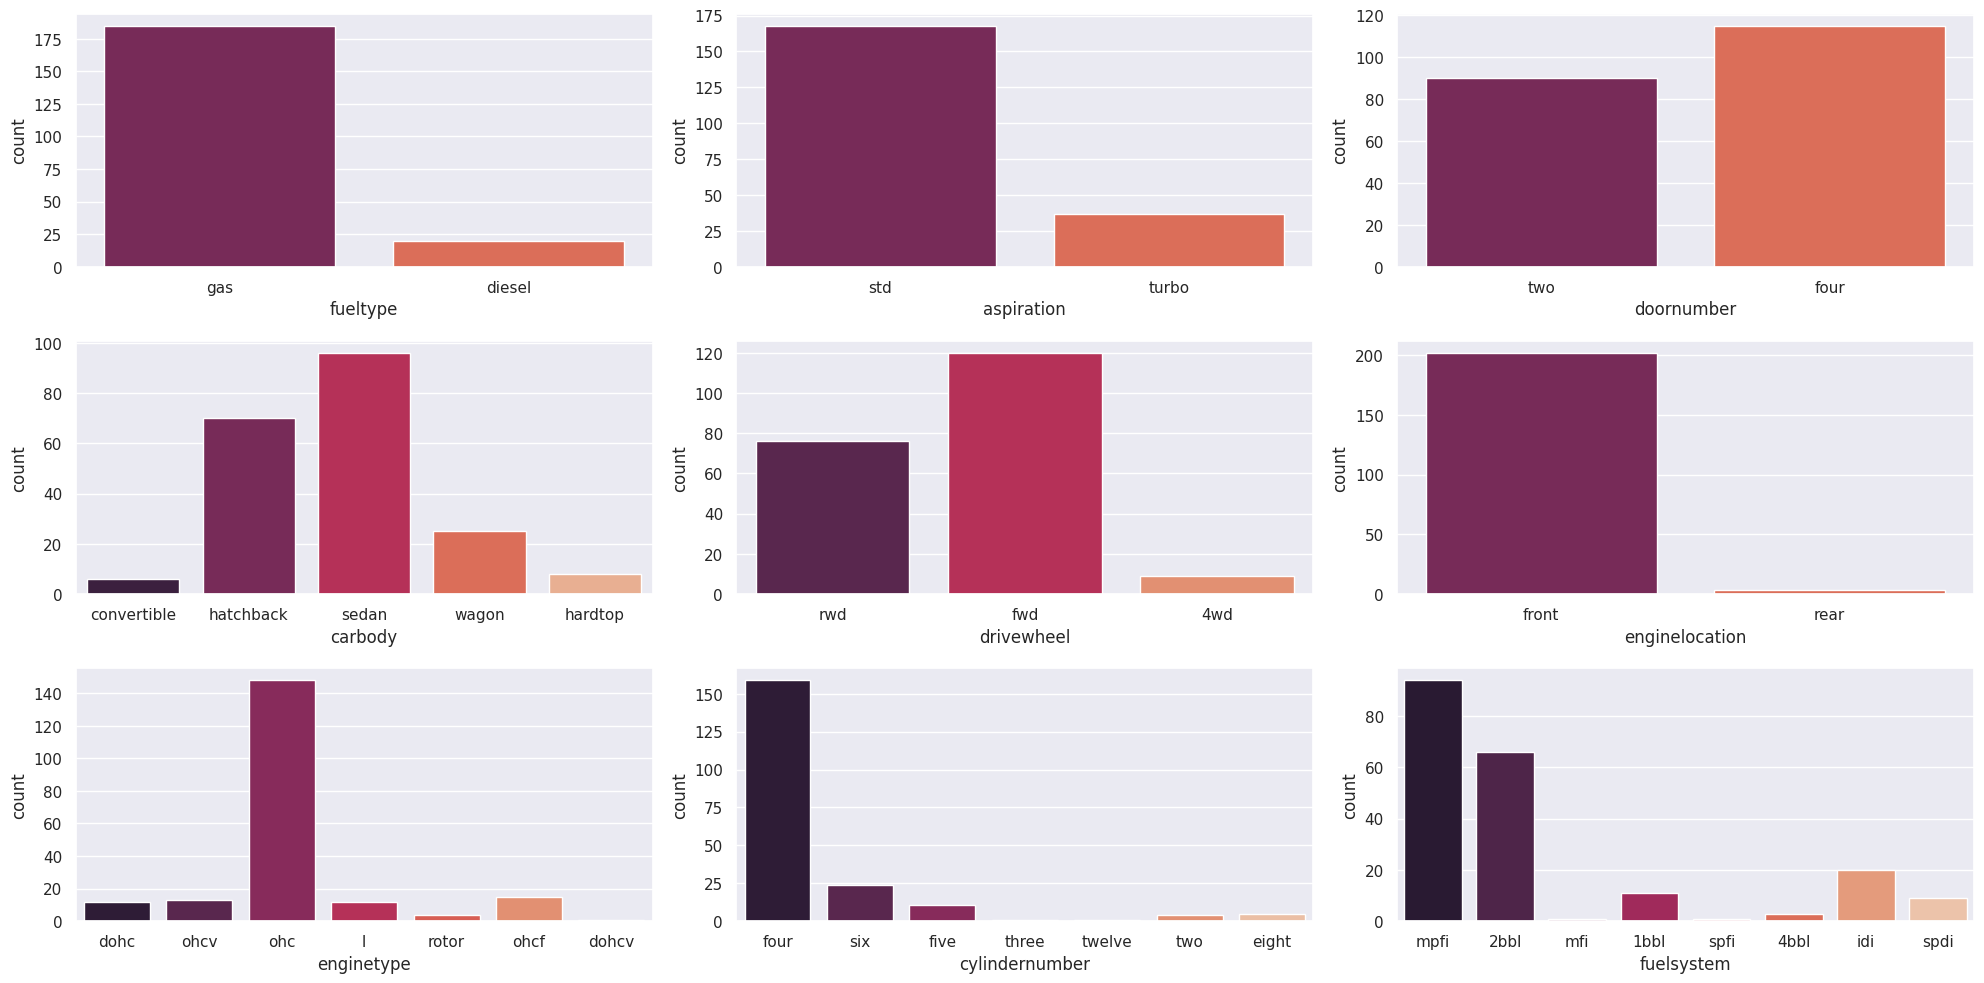

In [230]:
plt.figure(figsize=(20, 10))
for i in range(len(Categorical_Features)):
    plots = plt.subplot(3, 3, i+1)
    sns.countplot(x=df[Categorical_Features[i]],palette="rocket",hue=df[Categorical_Features[i]])

plt.tight_layout()
plt.show()

## Numerical Features

In [231]:
Numerical_Features=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
len(Numerical_Features)

15

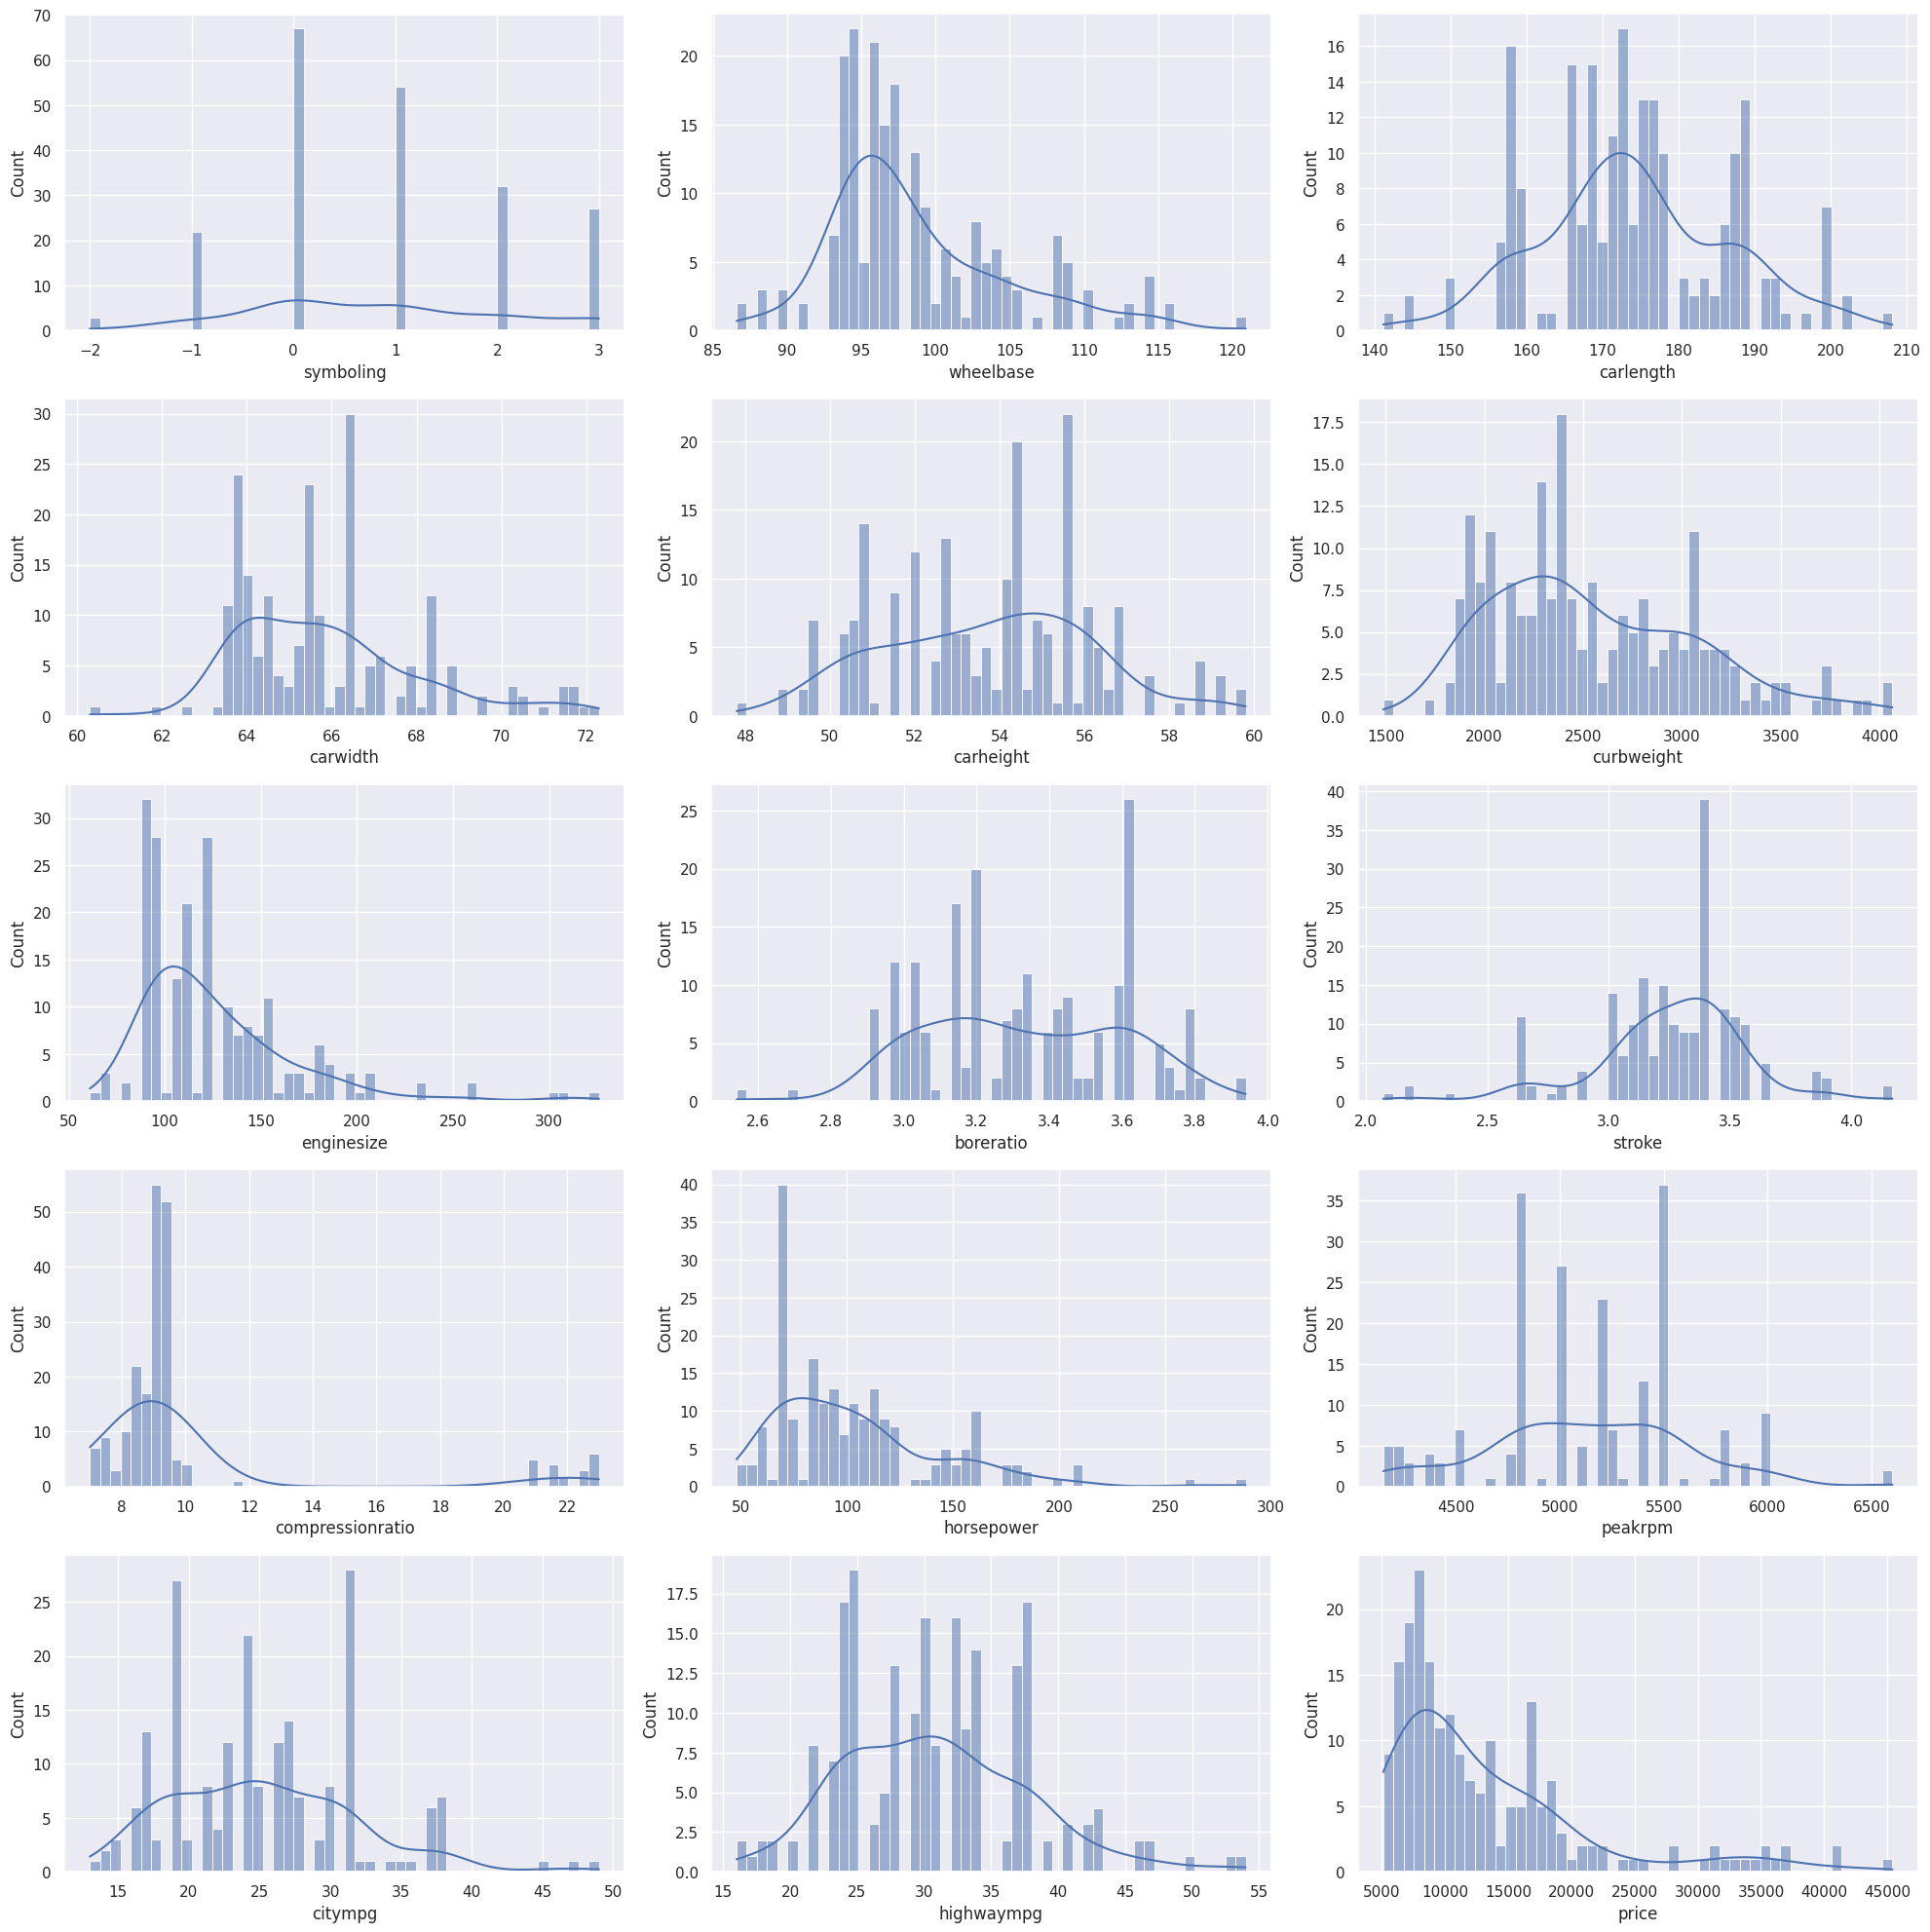

In [232]:
plt.figure(figsize=(20,20))
for i in range(len(Numerical_Features)):
    plots = plt.subplot(5,3,i+1)
    sns.histplot(x=df[Numerical_Features[i]],bins=50,kde=True)

plt.tight_layout()
plt.show()

- There are a lot of features that are right-skewed:
  * wheelbase
  * carwidth
  * curbweight
  * enginesize
  * compressionratio
  * horsepower
  * peakrpm
  * citympg
  * highwaympg
  * price

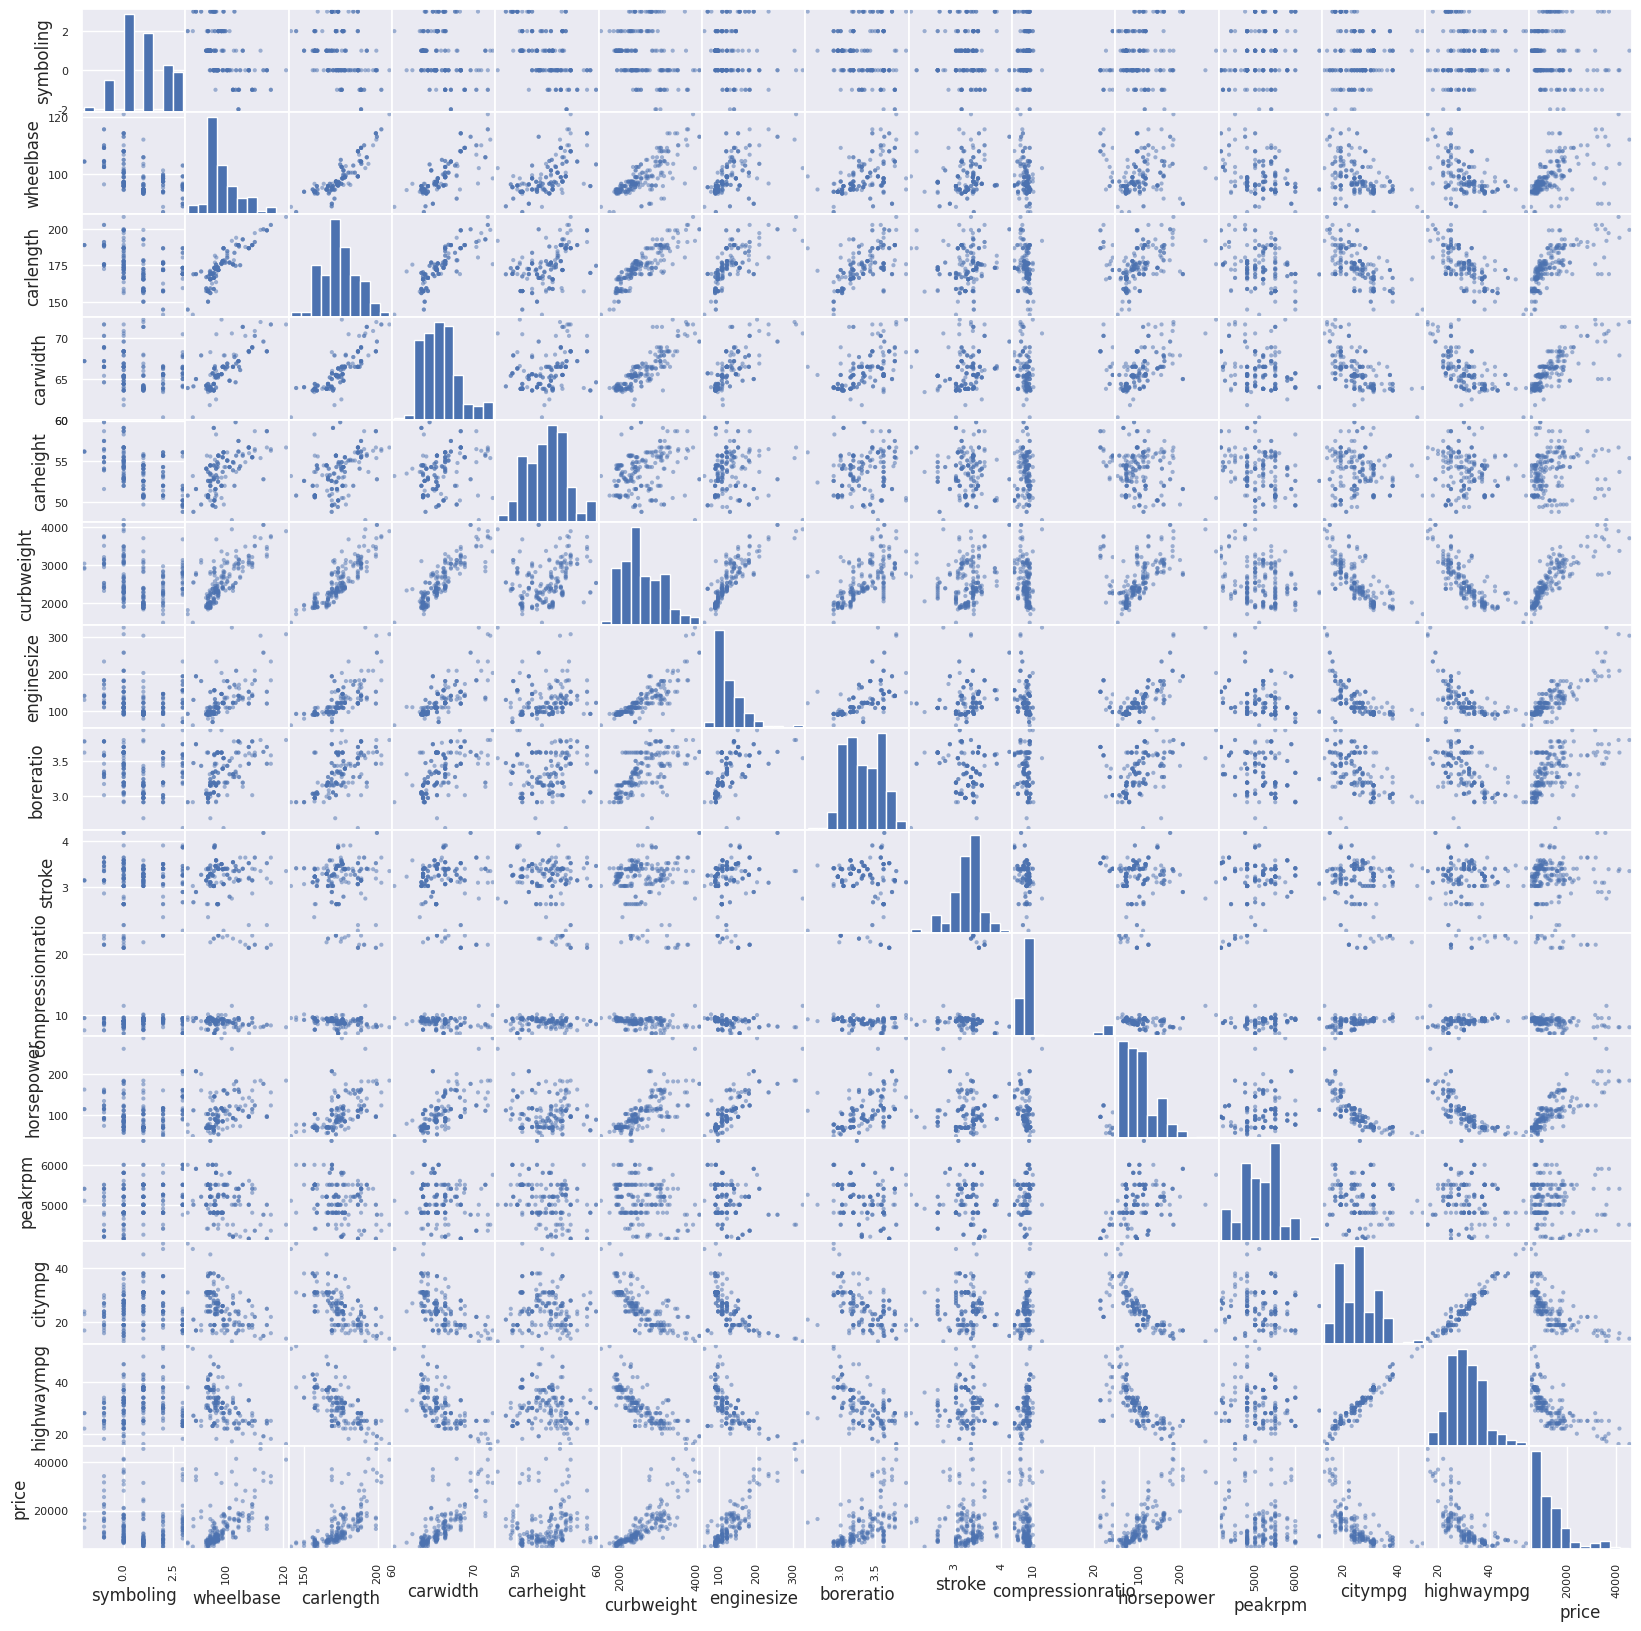

In [233]:
scatter_matrix(df[Numerical_Features],figsize=(20,20))
plt.show()

**Observations:-**

- The price may have positive relation with Horsepower, Bore ratio, Engine size, curbweight, car dimensions, wheelbase.
- There might be negtive relation between price and citympg and highwaympg.

###Skewness:

In [234]:
df[Numerical_Features].skew(numeric_only=True).sort_values(ascending=False)

compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64

**Observations:-**

- Most of the columns are right-skew.
- There is only 1 left-skewed column.

## Categorical Features With Numerical Features

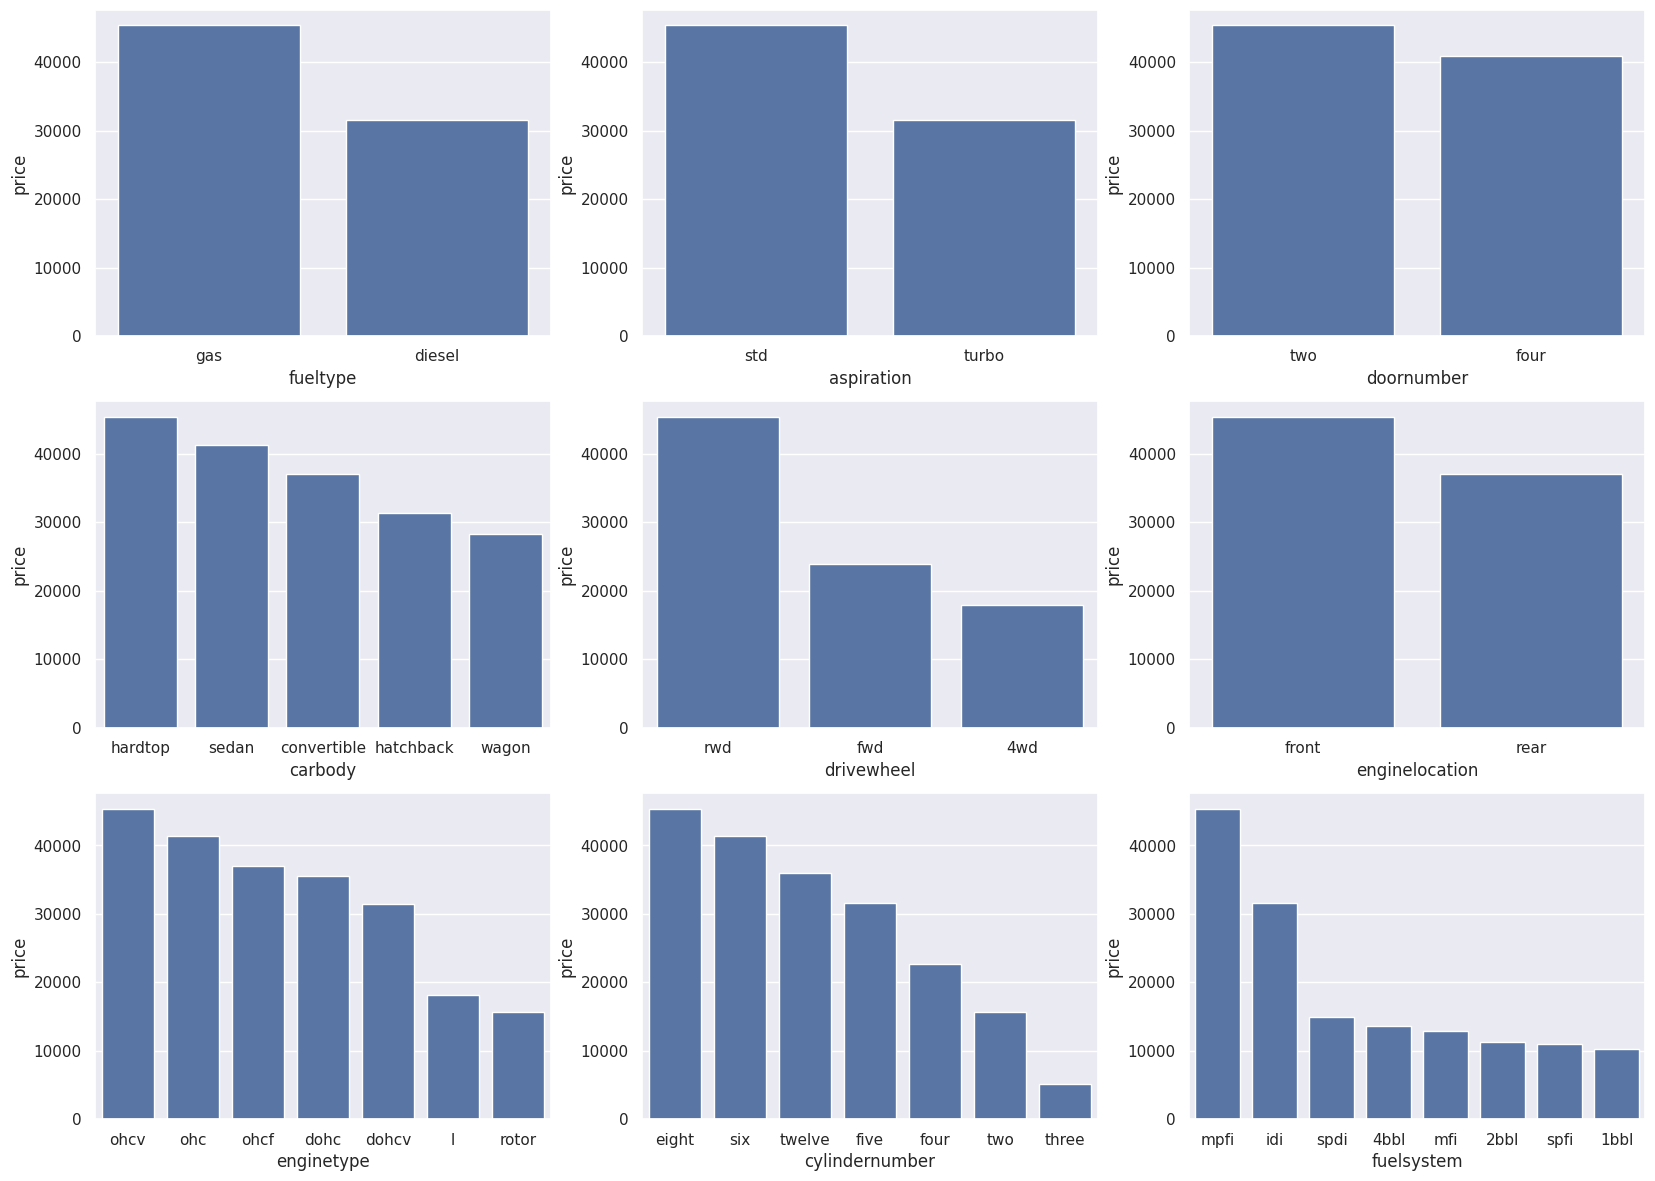

In [235]:
def line_plots(data,target):
  object_columns=data.select_dtypes(include=['object'])
  plt.figure(figsize=(20,50))

  for i,column in enumerate(object_columns.columns):
    if column=='CarName':
      continue
    else:
      grouped_data = data.groupby(column)[target].max()
      sorted_data = grouped_data.sort_values(ascending=False)
      plt.subplot(10,3,i)
      sns.barplot(sorted_data);

line_plots(df,'price')

- Checking if there is a relation between the Engine type, Engine location and Price

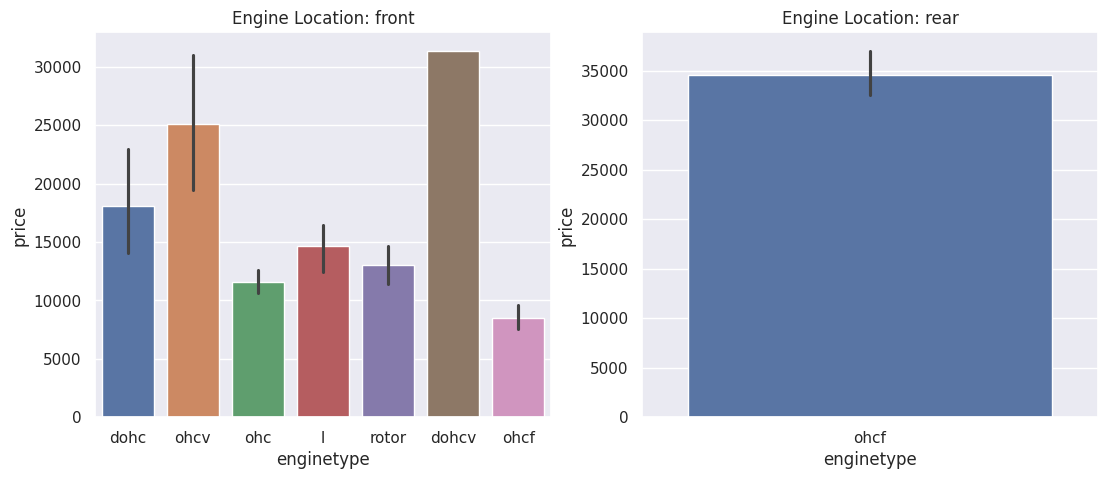

In [236]:
el_gr=df.groupby('enginelocation')
plt.figure(figsize=(20, 5))
i=1
for name,group in el_gr:
  plt.subplot(1,3,i)
  sns.barplot(data=group, x='enginetype',y='price',hue='enginetype')
  plt.title(f'Engine Location: {name}')
  i+=1

plt.show()

- "ohcf" engine type is the lowest price when it is placed at the front. But, when it is placed at the rear, it has the highest price.
- "ohcv" and "dohcv" engines that are located at the front, have the highest price.

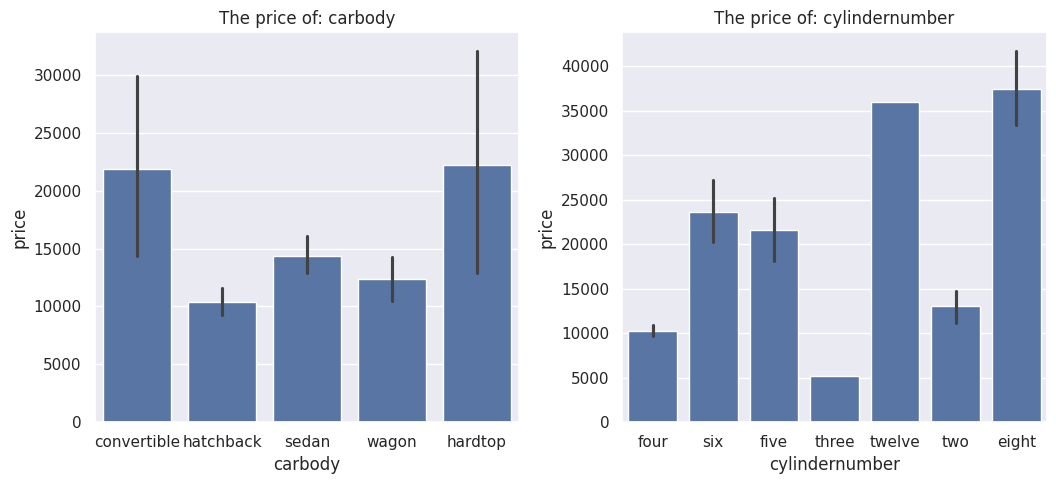

In [237]:
col_price=['carbody','cylindernumber']

plt.figure(figsize=(16, 5))
for i,sort in enumerate(col_price):
  plt.subplot(1,3,i+1)
  sns.barplot(x=df[sort],y=df['price'])
  plt.title(f'The price of: {sort}')
  i+=1

plt.tight_layout()

**Observations:-**
- Cars with eight cylinders has more value than twelve cylinders.
- Types of carbody indicates shapes of luxurious and medium class cars.
- Cylindernumber and Carbody will be encoded with Ordinal Encoder

##Detection of Outliers & Nulls

In [238]:
def boxplot_numeric_columns(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number'])
    num_cols = len(numeric_columns.columns)
    plt.figure(figsize=(25,20))
    for i, column in enumerate(numeric_columns.columns):
        plt.subplot(4,int(num_cols/4), i+1)
        sns.boxplot(x=numeric_columns[column])
        plt.title(f'Box plot for {column}')

    plt.tight_layout()
    plt.show()

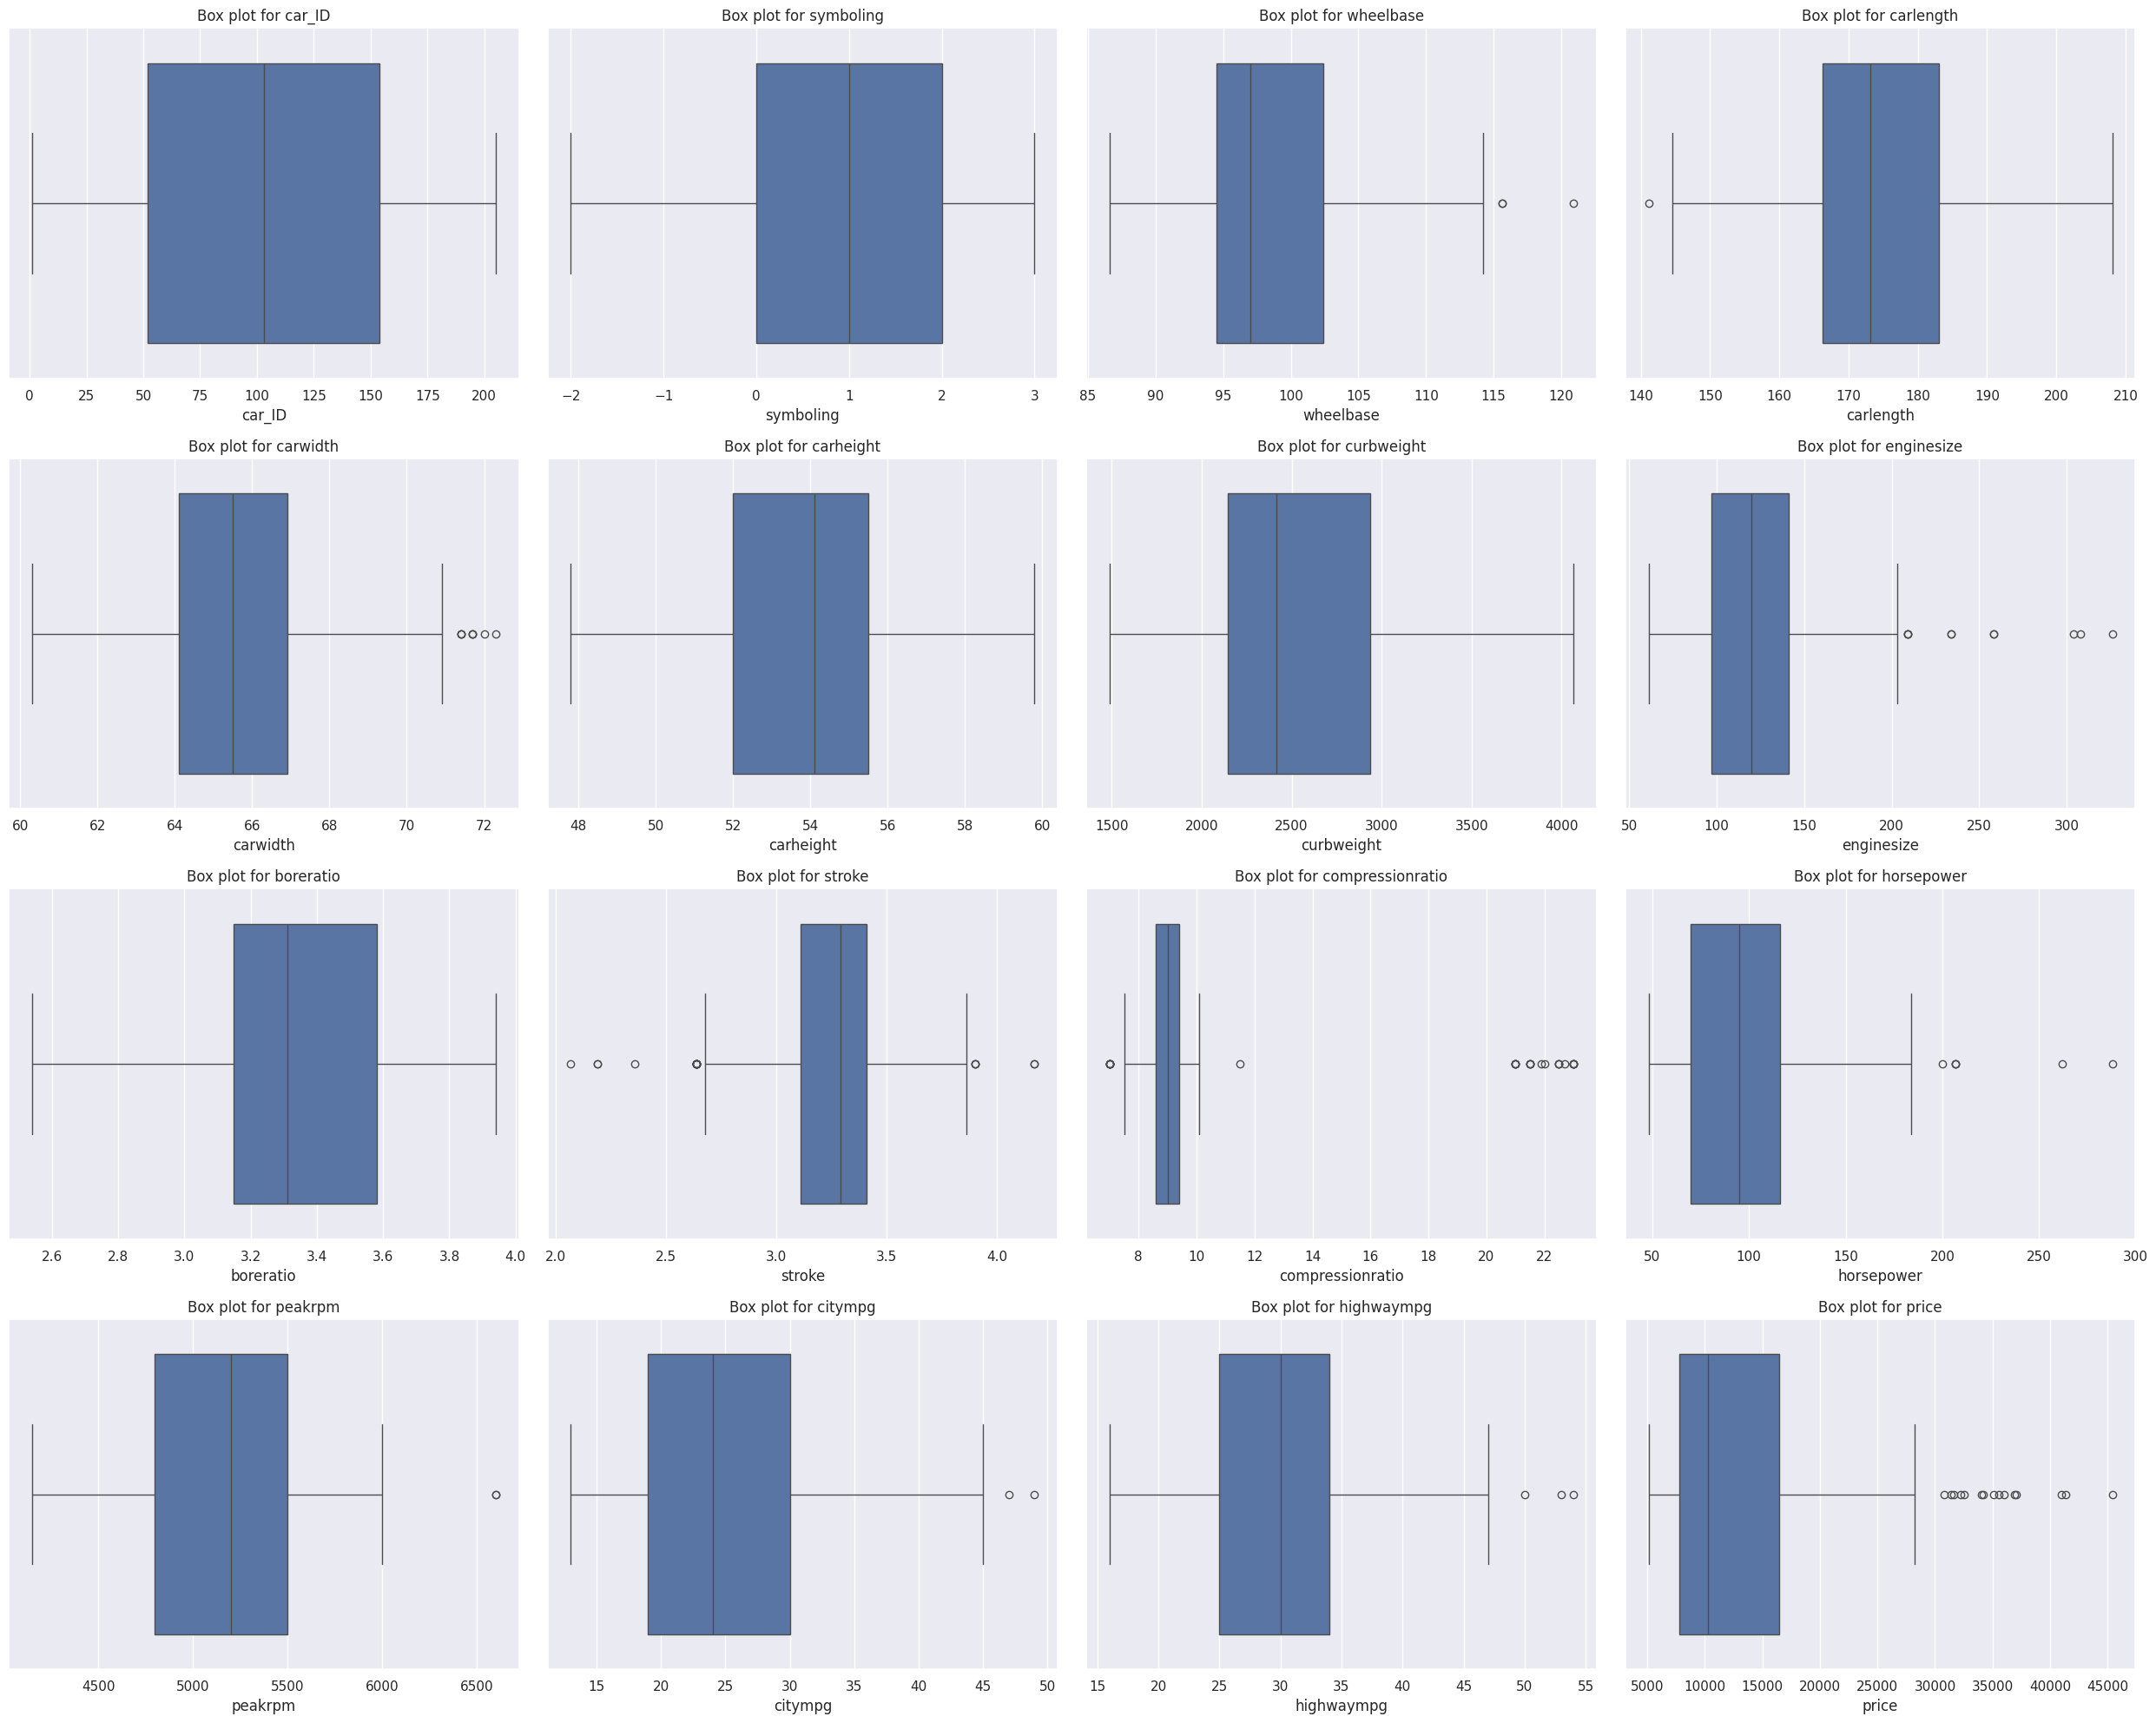

In [239]:
boxplot_numeric_columns(df)

**Observations:-**

- The dataset contains outliers in columns
    * wheelbase
    * carlength
    * carwidth
    * enginesize
    * stroke
    * compressionratio
    * horsepower
    * peakrpm
    * citympg
    * highwaympg
    * price

In [240]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

**Observations:-**

- Engine Type has value "l" that is meaningless.

## Correlation

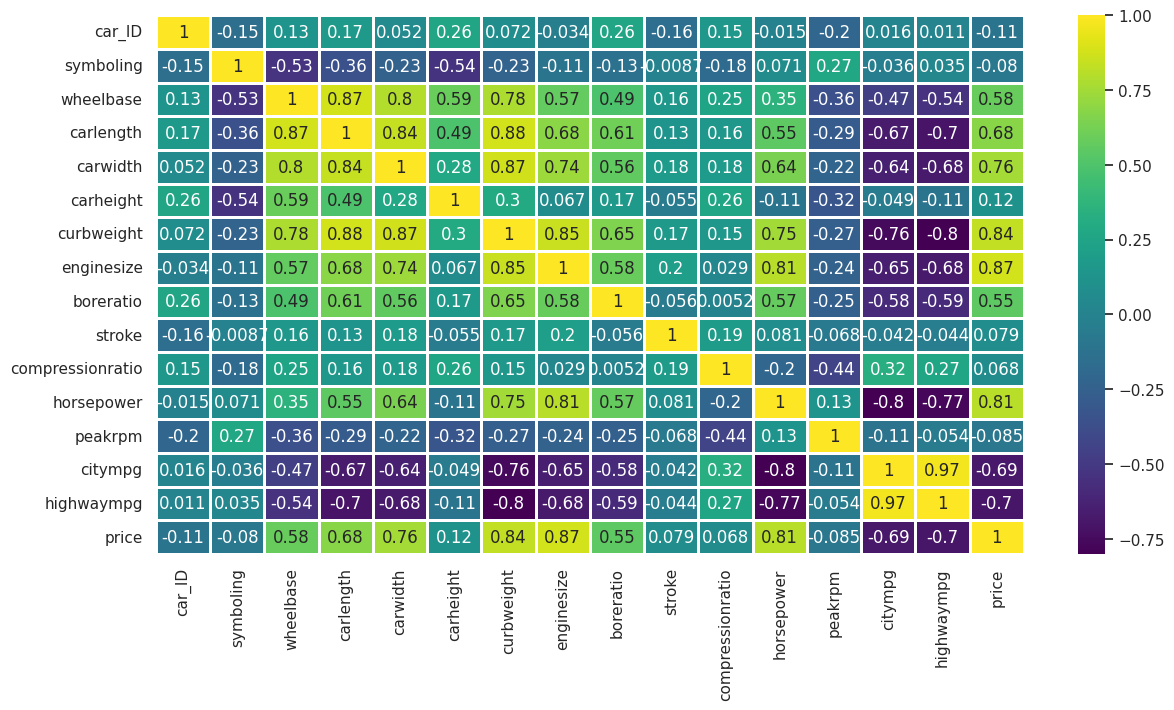

In [241]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True,linewidths=2,cmap='viridis')
plt.show()

**Observations:-**

- There is a strong positive relation between Price and (Horsepower,Boreratio, Enginesize, Curbweight, Car dimensions(length-width-height)).
- There is a strong negative relation between price and (Highwaympg, Citympg).


# 3. Data Cleaning

### Handing misssing Values (NaN)

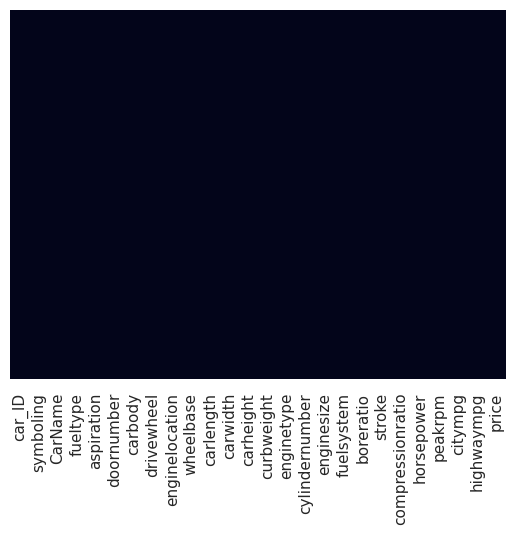

In [242]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [243]:
df1=df.copy()
df1['enginetype'].mode()

0    ohc
Name: enginetype, dtype: object

In [244]:
df1['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [245]:
df1['enginetype'] = df1['enginetype'].replace('l', df['enginetype'].mode()[0])
df1['enginetype'].value_counts()

ohc      160
ohcf      15
ohcv      13
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

## Duplicated

In [246]:
# Dropping 'car_ID' and 'CarName' columns
df1=df1.drop(['car_ID','CarName'],axis=1)

In [247]:
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,...,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,...,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,...,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,...,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,...,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,...,115,5500,18,22,17450.0


In [248]:
df1.duplicated().sum()

1

In [249]:
duplicated_index=df1[df1.duplicated()].index
duplicated_index

Int64Index([120], dtype='int64')

In [250]:
df1=df1.drop(duplicated_index,axis=0)

In [251]:
df1.duplicated().sum()

0

## Outlier Dectection (iqr) & Removing

In [252]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         204 non-null    int64  
 1   fueltype          204 non-null    object 
 2   aspiration        204 non-null    object 
 3   doornumber        204 non-null    object 
 4   carbody           204 non-null    object 
 5   drivewheel        204 non-null    object 
 6   enginelocation    204 non-null    object 
 7   wheelbase         204 non-null    float64
 8   carlength         204 non-null    float64
 9   carwidth          204 non-null    float64
 10  carheight         204 non-null    float64
 11  curbweight        204 non-null    int64  
 12  enginetype        204 non-null    object 
 13  cylindernumber    204 non-null    object 
 14  enginesize        204 non-null    int64  
 15  fuelsystem        204 non-null    object 
 16  boreratio         204 non-null    float64
 1

In [253]:
def remove_outliers_iqr(data,columns):
    sum_of_outliers=0
    for col in columns:
        if data[col].dtype != 'object':
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr= q3-q1
            lower_whisker = q1 - 1.5*iqr
            upper_whisker = q3 + 1.5*iqr
            filt= (data[col]<lower_whisker) | (data[col]>upper_whisker)
            sum_of_outliers+=len(data[filt].index)
            data=data.drop(data[filt].index,axis=0)
    print(f'Number of outliers= {sum_of_outliers}')
    data.reset_index(drop=True,inplace=True)
    return data

In [254]:
col_boxplot1=['wheelbase','carlength','carwidth','enginesize','stroke',
             'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [255]:
df1=remove_outliers_iqr(df1,col_boxplot1)

Number of outliers= 76


In [256]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         128 non-null    int64  
 1   fueltype          128 non-null    object 
 2   aspiration        128 non-null    object 
 3   doornumber        128 non-null    object 
 4   carbody           128 non-null    object 
 5   drivewheel        128 non-null    object 
 6   enginelocation    128 non-null    object 
 7   wheelbase         128 non-null    float64
 8   carlength         128 non-null    float64
 9   carwidth          128 non-null    float64
 10  carheight         128 non-null    float64
 11  curbweight        128 non-null    int64  
 12  enginetype        128 non-null    object 
 13  cylindernumber    128 non-null    object 
 14  enginesize        128 non-null    int64  
 15  fuelsystem        128 non-null    object 
 16  boreratio         128 non-null    float64
 1

## Outlier Dectection (Z Score) & Removing

In [257]:
df2=df.copy()

In [258]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [259]:
col_boxplot2=['wheelbase','carlength','carwidth','enginesize','stroke',
             'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [260]:
for col in col_boxplot2:
  outliers=df2[((df2[col] - df2[col].mean() ) / df2[col].std()<-2) | ((df2[col] - df2[col].mean() ) / df2[col].std()>2)].index
  df2=df2.drop(outliers,axis=0)

In [261]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 200
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            106 non-null    int64  
 1   symboling         106 non-null    int64  
 2   CarName           106 non-null    object 
 3   fueltype          106 non-null    object 
 4   aspiration        106 non-null    object 
 5   doornumber        106 non-null    object 
 6   carbody           106 non-null    object 
 7   drivewheel        106 non-null    object 
 8   enginelocation    106 non-null    object 
 9   wheelbase         106 non-null    float64
 10  carlength         106 non-null    float64
 11  carwidth          106 non-null    float64
 12  carheight         106 non-null    float64
 13  curbweight        106 non-null    int64  
 14  enginetype        106 non-null    object 
 15  cylindernumber    106 non-null    object 
 16  enginesize        106 non-null    int64  
 1

## Removing Irrelevant Columns

## Skewness

In [262]:
pd.options.display.max_rows=None
columns_skew=df1.skew(numeric_only=True).sort_values(ascending=False)
columns_skew

horsepower          0.978168
wheelbase           0.934026
price               0.821833
enginesize          0.775902
carwidth            0.532668
boreratio           0.481537
curbweight          0.417801
citympg             0.253650
carheight           0.210634
highwaympg          0.180369
symboling           0.059013
carlength          -0.026960
peakrpm            -0.160371
compressionratio   -0.355930
stroke             -0.464882
dtype: float64

In [263]:
pd.options.display.max_rows=10
pd.options.display.max_columns=10

In [264]:
def logTrans(data,features):
    numeric_features = data.select_dtypes(include=[np.number]).columns
    for feature in features:
        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_log = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_log,bins=20, kde=True , legend=False)
        plt.xlabel(feature)
        plt.show()
        print(f"Skewness was {round(data[feature].skew(),2)} before & is {round(df_log[0].skew(),2)} after Log transformation.")
        data[feature] = df_log[0]
    return data

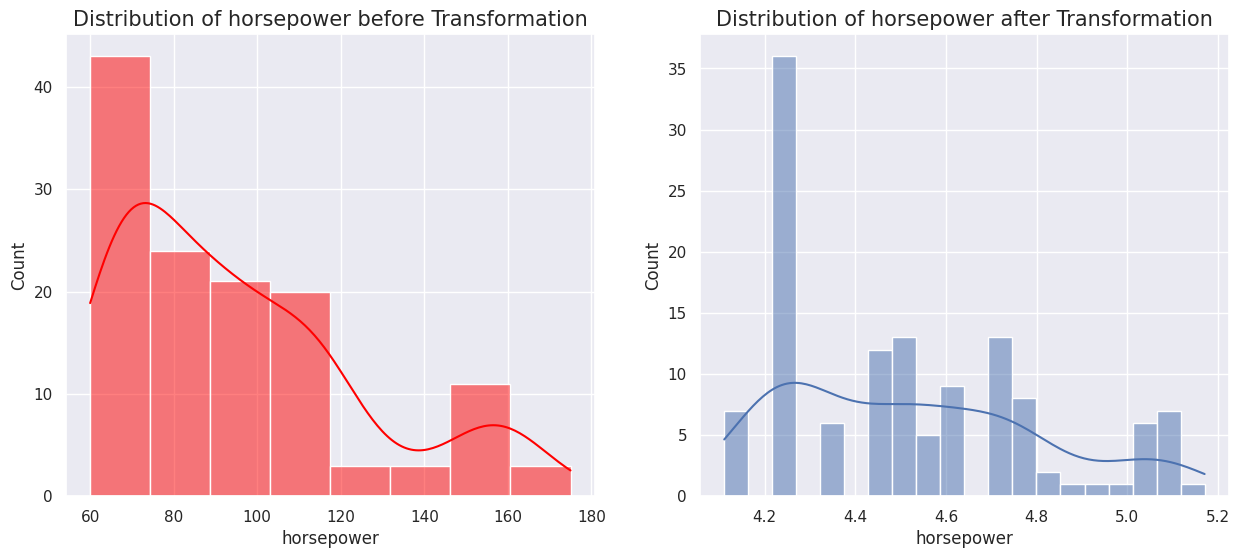

Skewness was 0.98 before & is 0.54 after Log transformation.


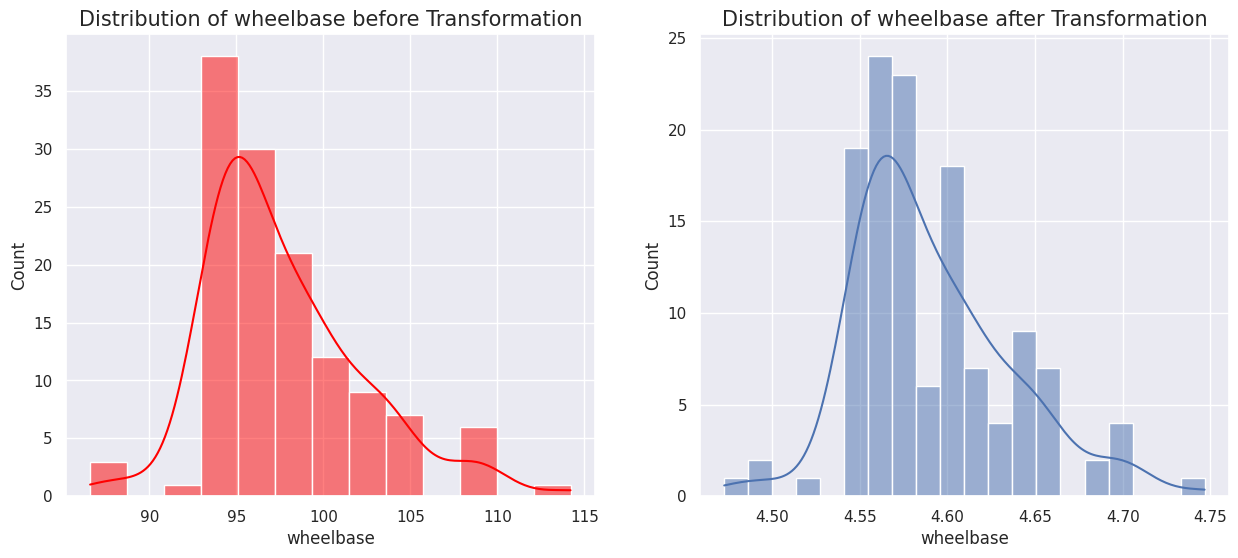

Skewness was 0.93 before & is 0.77 after Log transformation.


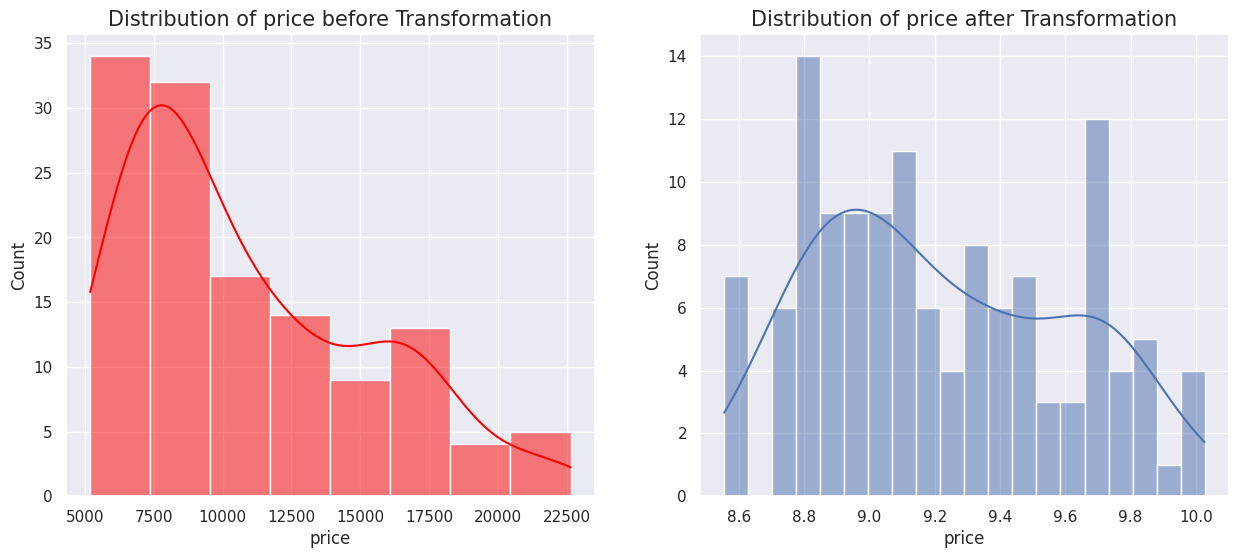

Skewness was 0.82 before & is 0.3 after Log transformation.


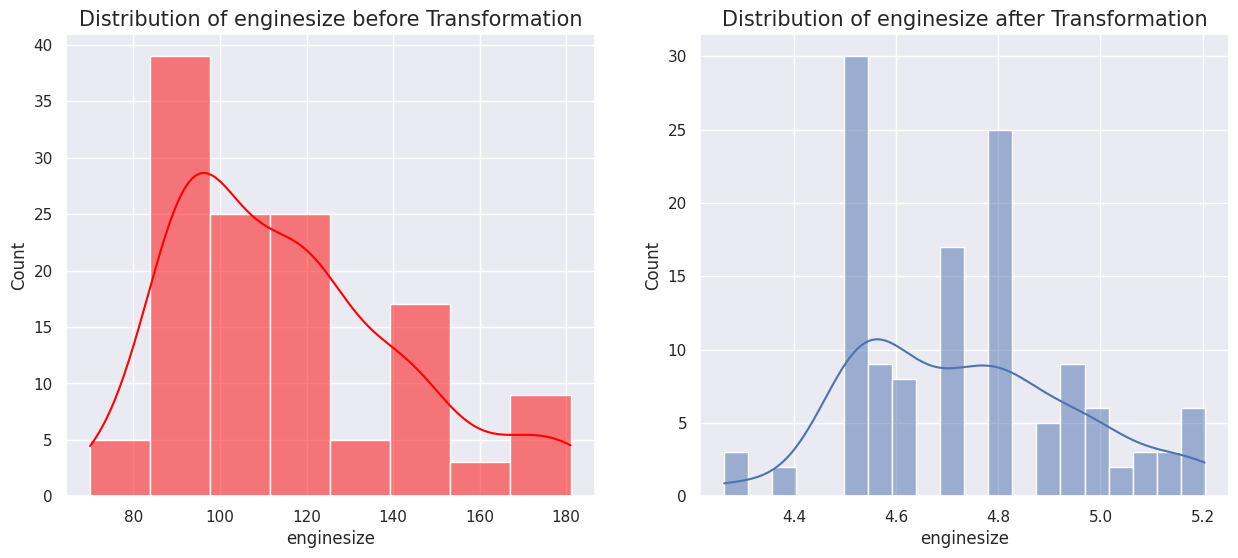

Skewness was 0.78 before & is 0.33 after Log transformation.


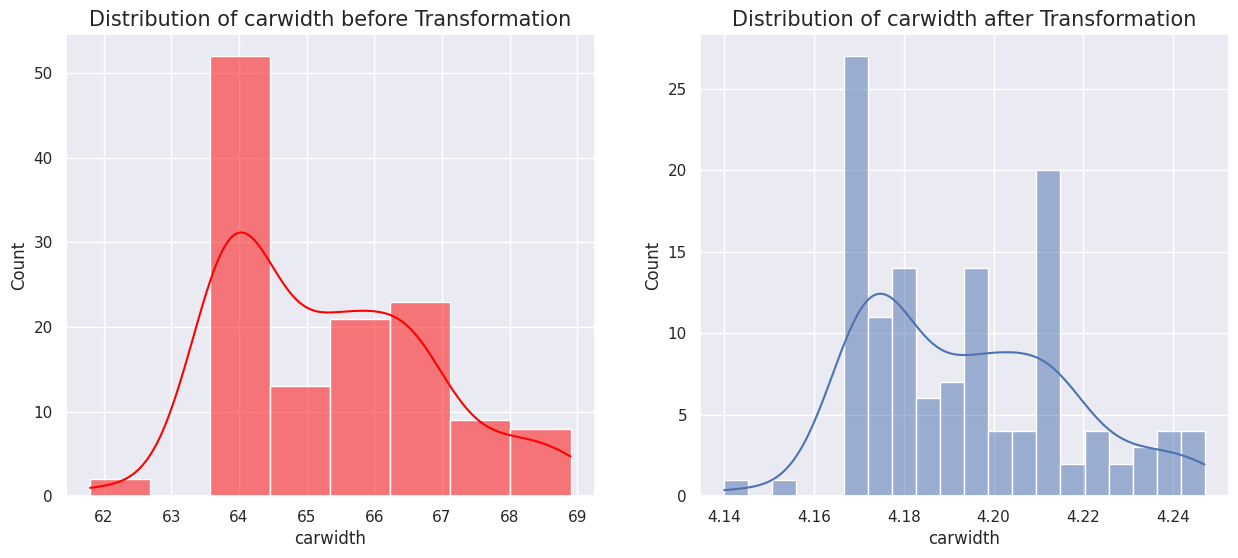

Skewness was 0.53 before & is 0.49 after Log transformation.


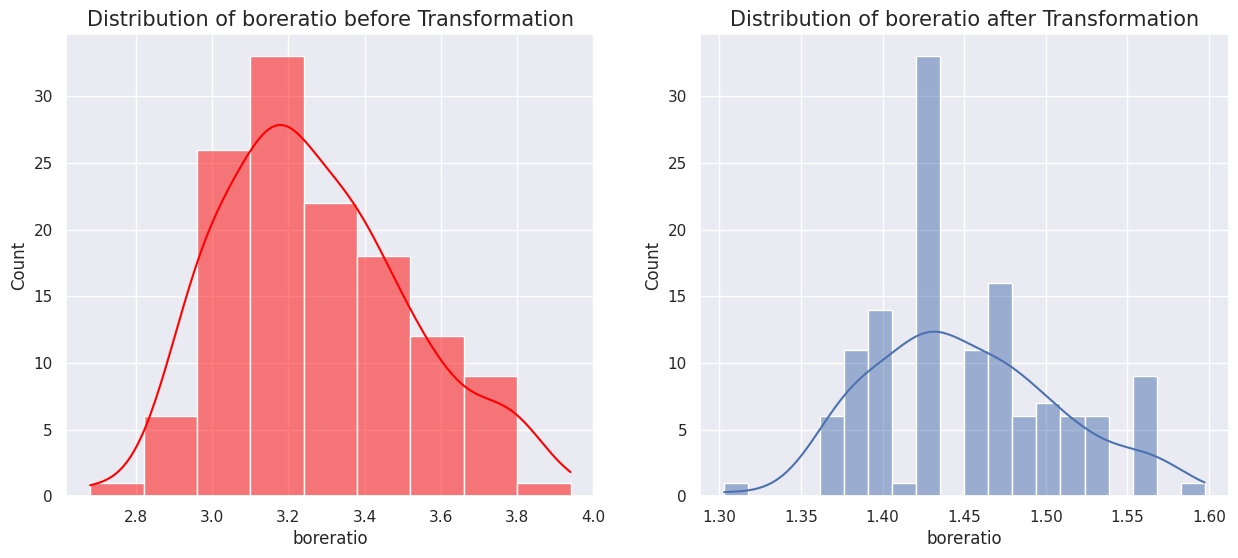

Skewness was 0.48 before & is 0.35 after Log transformation.


In [265]:
df1=logTrans(df1,features=columns_skew[0:6].index)

In [266]:
pd.options.display.max_rows=None
columns_skew=df1.skew(numeric_only=True).sort_values(ascending=False)
columns_skew

wheelbase           0.774869
horsepower          0.537731
carwidth            0.488037
curbweight          0.417801
boreratio           0.350195
enginesize          0.334133
price               0.300719
citympg             0.253650
carheight           0.210634
highwaympg          0.180369
symboling           0.059013
carlength          -0.026960
peakrpm            -0.160371
compressionratio   -0.355930
stroke             -0.464882
dtype: float64

In [267]:
data_info(df1)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",0
1,fueltype,object,1,0,[gas],0
2,aspiration,object,2,0,"[std, turbo]",0
3,doornumber,object,2,0,"[four, two]",0
4,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",0
5,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
6,enginelocation,object,1,0,[front],0
7,wheelbase,float64,33,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",0
8,carlength,float64,53,0,"[157.3, 188.8, 176.2, 166.3, 186.6, 177.8, 165...",0
9,carwidth,float64,31,0,"[4.212127597878484, 4.1713056033582285, 4.1682...",0


In [268]:
df1=df1.drop(['fueltype','enginelocation',],axis=1)

In [269]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         128 non-null    int64  
 1   aspiration        128 non-null    object 
 2   doornumber        128 non-null    object 
 3   carbody           128 non-null    object 
 4   drivewheel        128 non-null    object 
 5   wheelbase         128 non-null    float64
 6   carlength         128 non-null    float64
 7   carwidth          128 non-null    float64
 8   carheight         128 non-null    float64
 9   curbweight        128 non-null    int64  
 10  enginetype        128 non-null    object 
 11  cylindernumber    128 non-null    object 
 12  enginesize        128 non-null    float64
 13  fuelsystem        128 non-null    object 
 14  boreratio         128 non-null    float64
 15  stroke            128 non-null    float64
 16  compressionratio  128 non-null    float64
 1

## Encoding Categorical Columns

In [270]:
data_info(df1)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",0
1,aspiration,object,2,0,"[std, turbo]",0
2,doornumber,object,2,0,"[four, two]",0
3,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",0
4,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
5,wheelbase,float64,33,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",0
6,carlength,float64,53,0,"[157.3, 188.8, 176.2, 166.3, 186.6, 177.8, 165...",0
7,carwidth,float64,31,0,"[4.212127597878484, 4.1713056033582285, 4.1682...",0
8,carheight,float64,39,0,"[52.0, 54.1, 50.8, 54.5, 55.5, 56.1, 54.3, 52....",0
9,curbweight,int64,111,0,"[1918, 2385, 1989, 2548, 1876, 2410, 2380, 202...",0


- Objects to be label encoded: ['aspiration', 'doornumber', 'drivewheel', 'enginetype', 'fuelsystem']

- Objects to be ordinal encoded: ['carbody', 'cylindernumber']

In [271]:
from sklearn.preprocessing import LabelEncoder

columns = ['aspiration', 'doornumber', 'drivewheel', 'enginetype', 'fuelsystem']

LE = LabelEncoder()
df1[columns] = df1[columns].apply(LE.fit_transform)

In [272]:
carbody_rank=['hatchback','wagon','sedan','convertible','hardtop']
cylindernumber_rank=['three','four','two','five','six','twelve','eight']
OE_columns=['carbody','cylindernumber']

In [273]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder(categories=[carbody_rank,cylindernumber_rank])
transformed_columns=OE.fit_transform(df1[OE_columns]).astype(int)
df1['carbody_OE']=transformed_columns[:, 0]
df1['cylindernumber_OE']=transformed_columns[:, 1]

In [274]:
df1.head()

,symboling,aspiration,doornumber,carbody,drivewheel,...,citympg,highwaympg,price,carbody_OE,cylindernumber_OE
0,3,0,1,convertible,2,...,21,27,9.510149,3,1
1,3,0,1,convertible,2,...,21,27,9.711176,3,1
2,1,0,1,hatchback,2,...,19,26,9.711176,0,4
3,2,0,0,sedan,1,...,24,30,9.543306,2,1
4,2,0,0,sedan,0,...,18,22,9.767152,2,3


In [275]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None
data_info(df1)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",0
1,aspiration,int64,2,0,"[0, 1]",0
2,doornumber,int64,2,0,"[0, 1]",0
3,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",0
4,drivewheel,int64,3,0,"[1, 2, 0]",0
5,wheelbase,float64,33,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",0
6,carlength,float64,53,0,"[157.3, 188.8, 176.2, 166.3, 186.6, 177.8, 165...",0
7,carwidth,float64,31,0,"[4.212127597878484, 4.1713056033582285, 4.1682...",0
8,carheight,float64,39,0,"[52.0, 54.1, 50.8, 54.5, 55.5, 56.1, 54.3, 52....",0
9,curbweight,int64,111,0,"[1918, 2385, 1989, 2548, 1876, 2410, 2380, 202...",0


##Dropping Categorical Columns

In [276]:
df_final=df1.copy()

In [277]:
df_final=df_final.drop(['carbody','cylindernumber'],axis=1)

In [278]:
df_final.head()

,symboling,aspiration,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carbody_OE,cylindernumber_OE
0,3,0,1,2,4.495355,168.8,4.175925,48.8,2548,0,4.875197,3,1.497388,2.68,9.0,4.718499,5000,21,27,9.510149,3,1
1,3,0,1,2,4.495355,168.8,4.175925,48.8,2548,0,4.875197,3,1.497388,2.68,9.0,4.718499,5000,21,27,9.711176,3,1
2,1,0,1,2,4.559126,171.2,4.197202,52.4,2823,2,5.030438,3,1.302913,3.47,9.0,5.043425,5000,19,26,9.711176,0,4
3,2,0,0,1,4.613138,176.6,4.207673,54.3,2337,1,4.700480,3,1.432701,3.40,10.0,4.634729,5500,24,30,9.543306,2,1
4,2,0,0,0,4.609162,176.6,4.210645,54.3,2824,1,4.919981,3,1.432701,3.40,8.0,4.753590,5500,18,22,9.767152,2,3


In [279]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          128 non-null    int64  
 1   aspiration         128 non-null    int64  
 2   doornumber         128 non-null    int64  
 3   drivewheel         128 non-null    int64  
 4   wheelbase          128 non-null    float64
 5   carlength          128 non-null    float64
 6   carwidth           128 non-null    float64
 7   carheight          128 non-null    float64
 8   curbweight         128 non-null    int64  
 9   enginetype         128 non-null    int64  
 10  enginesize         128 non-null    float64
 11  fuelsystem         128 non-null    int64  
 12  boreratio          128 non-null    float64
 13  stroke             128 non-null    float64
 14  compressionratio   128 non-null    float64
 15  horsepower         128 non-null    float64
 16  peakrpm            128 non

- Now we have all the data in Dtype of (int & float).

##Data Splitting into train and test.

In [280]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['price'],axis=1)
y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Feature Scaling

In [281]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
df_final = rob_scaler.fit_transform(df_final)
X_train_scale=rob_scaler.fit_transform(X_train)
X_test_scale=rob_scaler.transform(X_test)